<a href="https://colab.research.google.com/github/VihaShahh/Unemployment_Analysis-With-Python/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.simplefilter("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/Unemployment_Rate_upto_11_2020 (2).csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df.shape

(267, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [ ]:
continuous = ["Estimated Unemployment Rate (%)", "Estimated Labour Participation Rate (%)", "longitude", "latitude"]
dis_catagorical = ["Region", "Date", "Frequency", "Region.1"]
dis_count = ["Estimated Employed"]

In [ ]:
# Descriptive Statistics
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [ ]:
# Descriptive Statistics
df.describe(include=object)

,Region,Date,Frequency,Region.1
count,267,267,267,267
unique,27,10,1,5
top,Andhra Pradesh,31-03-2020,M,North
freq,10,27,267,79


In [ ]:
# Descriptive Statistics
df.describe(include = "all")

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
count,267,267,267,267.000000,2.670000e+02,267.000000,267,267.000000,267.000000
unique,27,10,1,NaN,NaN,NaN,5,NaN,NaN
top,Andhra Pradesh,31-03-2020,M,NaN,NaN,NaN,North,NaN,NaN
freq,10,27,267,NaN,NaN,NaN,79,NaN,NaN
mean,NaN,NaN,NaN,12.236929,1.396211e+07,41.681573,NaN,22.826048,80.532425
std,NaN,NaN,NaN,10.803283,1.336632e+07,7.845419,NaN,6.270731,5.831738
min,NaN,NaN,NaN,0.500000,1.175420e+05,16.770000,NaN,10.850500,71.192400
25%,NaN,NaN,NaN,4.845000,2.838930e+06,37.265000,NaN,18.112400,76.085600
50%,NaN,NaN,NaN,9.650000,9.732417e+06,40.390000,NaN,23.610200,79.019300
75%,NaN,NaN,NaN,16.755000,2.187869e+07,44.055000,NaN,27.278400,85.279900


In [ ]:
df.skew()

 Estimated Unemployment Rate (%)            2.224788
 Estimated Employed                         1.361110
 Estimated Labour Participation Rate (%)    0.975061
longitude                                  -0.382344
latitude                                    0.722542
dtype: float64

In [ ]:
# Rename the col name by rename function
df = df.rename(columns={df.columns[0]:'State',df.columns[3]:'EUR',df.columns[4]:'EE', df.columns[5]:'ELPR', df.columns[6]:'Region'})
df.head()

,State,Date,Frequency,EUR,EE,ELPR,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df["State"].value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: State, dtype: int64

In [ ]:
df["Region"].value_counts()

North        79
South        60
West         50
East         40
Northeast    38
Name: Region, dtype: int64

In [ ]:
# Total unemployed rate by region wise
df.groupby("Region").size()

Region
East         40
North        79
Northeast    38
South        60
West         50
dtype: int64

In [ ]:
region_stats = df.groupby(['Region'])[['EUR','EE','ELPR']].mean().reset_index()
region_stats = round(region_stats,2)
region_stats

,Region,EUR,EE,ELPR
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


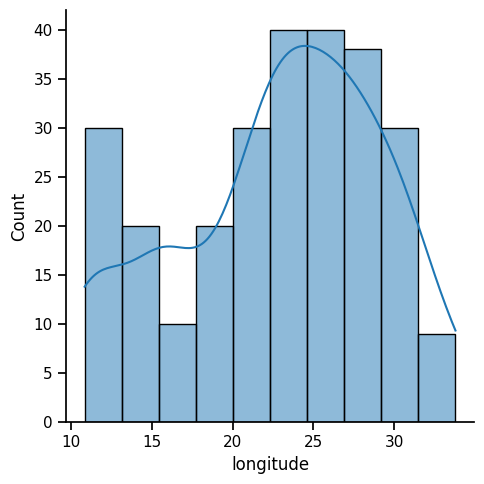

In [ ]:
sns.displot(df["longitude"], bins=10, kde=True)
plt.show()

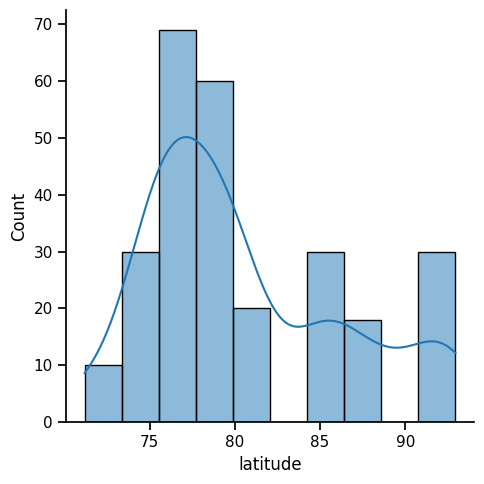

In [ ]:
sns.displot(df["latitude"], bins=10, kde=True)
plt.show()

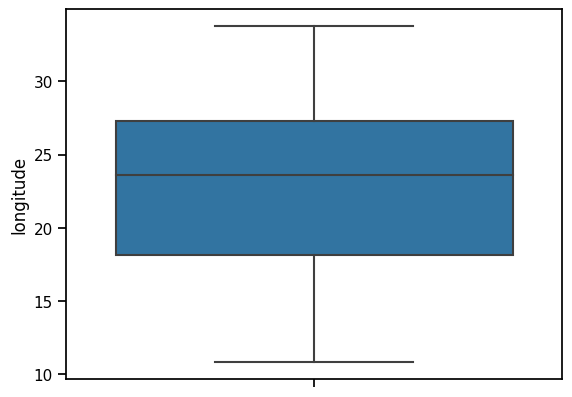

In [ ]:
sns.boxplot(y = df["longitude"])
plt.show()

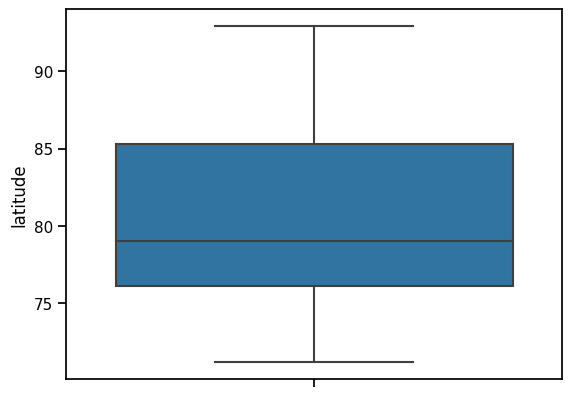

In [ ]:
sns.boxplot(y = df["latitude"])
plt.show()

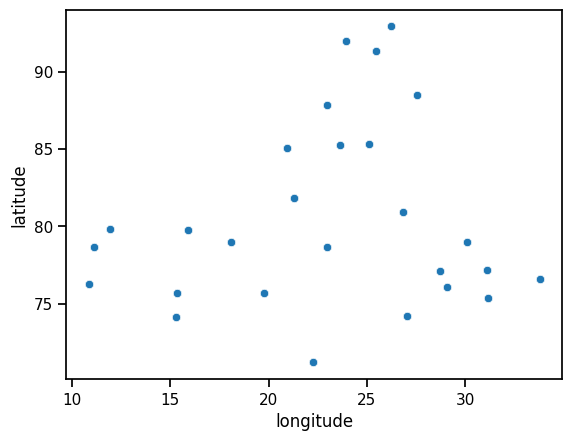

In [ ]:
sns.scatterplot(x = df["longitude"], y = df["latitude"])
plt.show()

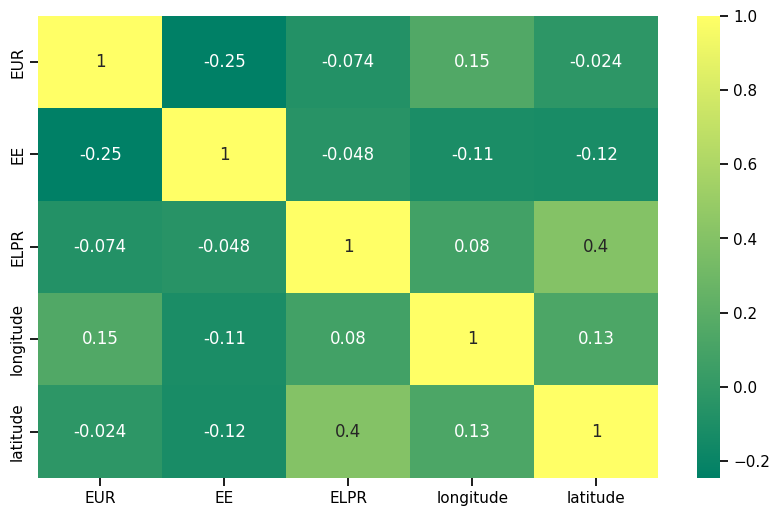

In [ ]:
# checking correlation of continuous variavle
heat_maps = df[['EUR','EE', 'ELPR','longitude', 'latitude']]

heat_maps = heat_maps.corr()

plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='summer');

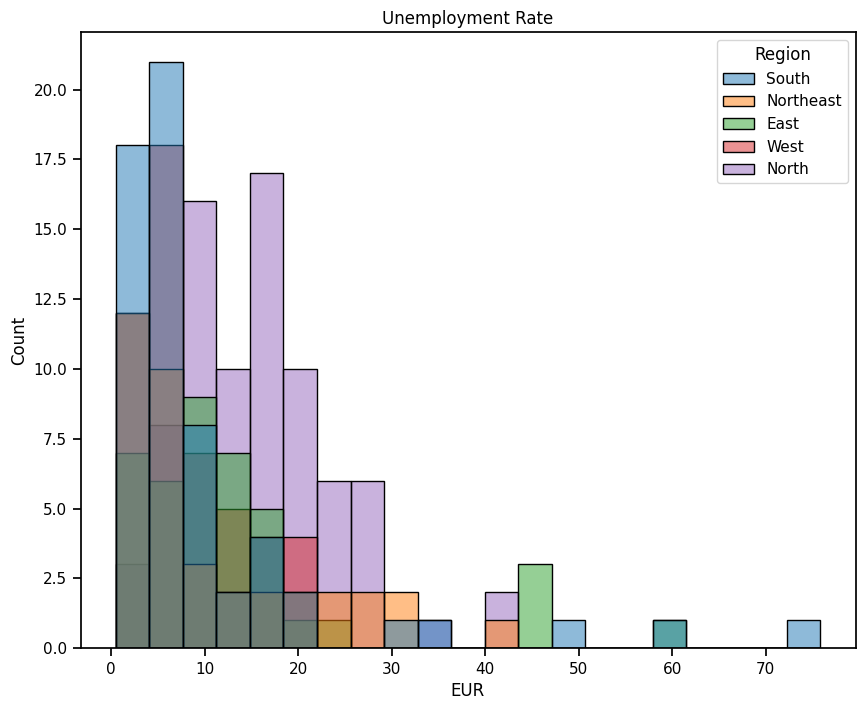

In [ ]:
#unemployment rate according to different regions of India
df.columns= ["State","Date","Frequency","EUR","EE","ELPR","Region","longitude","latitude"]

plt.figure(figsize=(10, 8))
plt.title("Unemployment Rate")
sns.histplot(x="EUR", hue="Region", data=df)
plt.show()

In [ ]:
import plotly.express as px
region = df.groupby(["Region"])[['EUR', "EE", "ELPR"]].mean()
region = pd.DataFrame(region).reset_index()

fig = px.bar(region, x="Region", y="EUR", color="Region", title="Average  of Unemployment Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
unemployment = df[["State", "Region", "EUR"]]

fig = px.sunburst(unemployment, path=['Region','State'], values='EUR',
                  title= 'Unemployment rate in every State and Region', height=650)
fig.show()